In [90]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets.samples_generator import make_blobs

from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

# Задача 1

In [99]:
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)
    
    
    
    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    
    ellipse.set_clip_box(ax.bbox)
    ellipse.set_alpha(0.5 - 0.125 * n_std)
    
    return ax.add_patch(ellipse)

In [100]:
from scipy import stats

In [101]:
q1 = 0.3186396

In [102]:
stats.norm.cdf(q1) - stats.norm.cdf(-q1)

0.25000017900716515

In [103]:
q2 = 0.6745
stats.norm.cdf(q2) - stats.norm.cdf(-q2)

0.5000065142726018

In [114]:
q3 = 1.150349888
stats.norm.cdf(q3) - stats.norm.cdf(-q3)

0.7500002089923203

In [115]:
X, _ = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)

np.random.seed(13)

X_stretched = np.dot(X, np.random.randn(2, 2))

x, y = X_stretched[:, 0], X_stretched[:, 1]

colors = ['magenta', 'green', 'blue', 'red']

n_classes = 4
gm = {cov_type: GaussianMixture(n_components=n_classes, covariance_type=cov_type, random_state=1) 
      for cov_type in ['spherical', 'diag', 'full']}

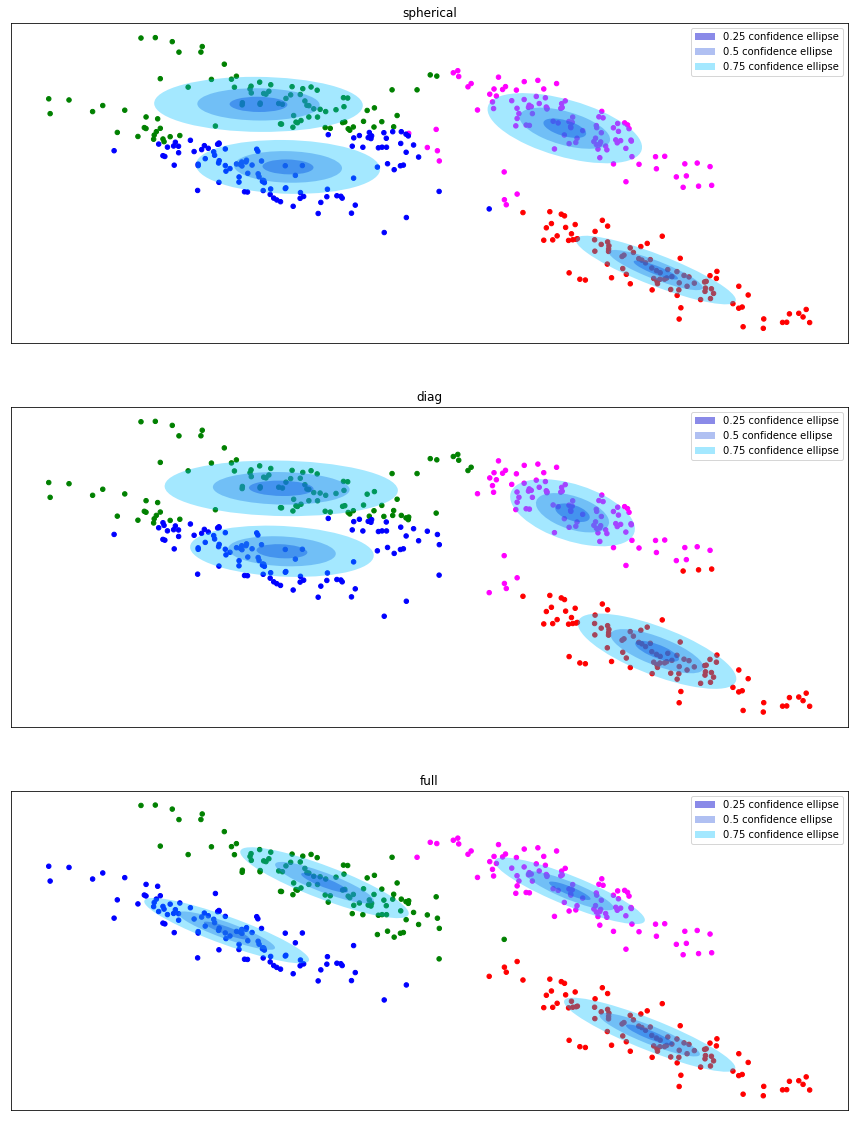

In [116]:
fig, ax = plt.subplots(nrows=3, figsize=(15, 20))

for index, (name, estimator) in enumerate(gm.items()):
    model = estimator.fit(X_stretched)
    predict = model.predict(X_stretched)
    
    ax[index].scatter(x, y, s=20, c=np.array(colors)[predict])
    
    for i in range(4):
        if i == 1:
            ax[index].legend()
        confidence_ellipse(x[predict == i], y[predict == i], ax[index], n_std=q1,
                       label='0.25 confidence ellipse', facecolor='mediumblue')
        confidence_ellipse(x[predict == i], y[predict == i], ax[index], n_std=q2,
                       label='0.5 confidence ellipse', facecolor='royalblue')
        confidence_ellipse(x[predict == i], y[predict == i], ax[index], n_std=q3,
                       label='0.75 confidence ellipse', facecolor='deepskyblue')
    
    
    ax[index].set_title(name)
    ax[index].set_xticks(())
    ax[index].set_yticks(())
    

plt.show()
    

# Задача 2

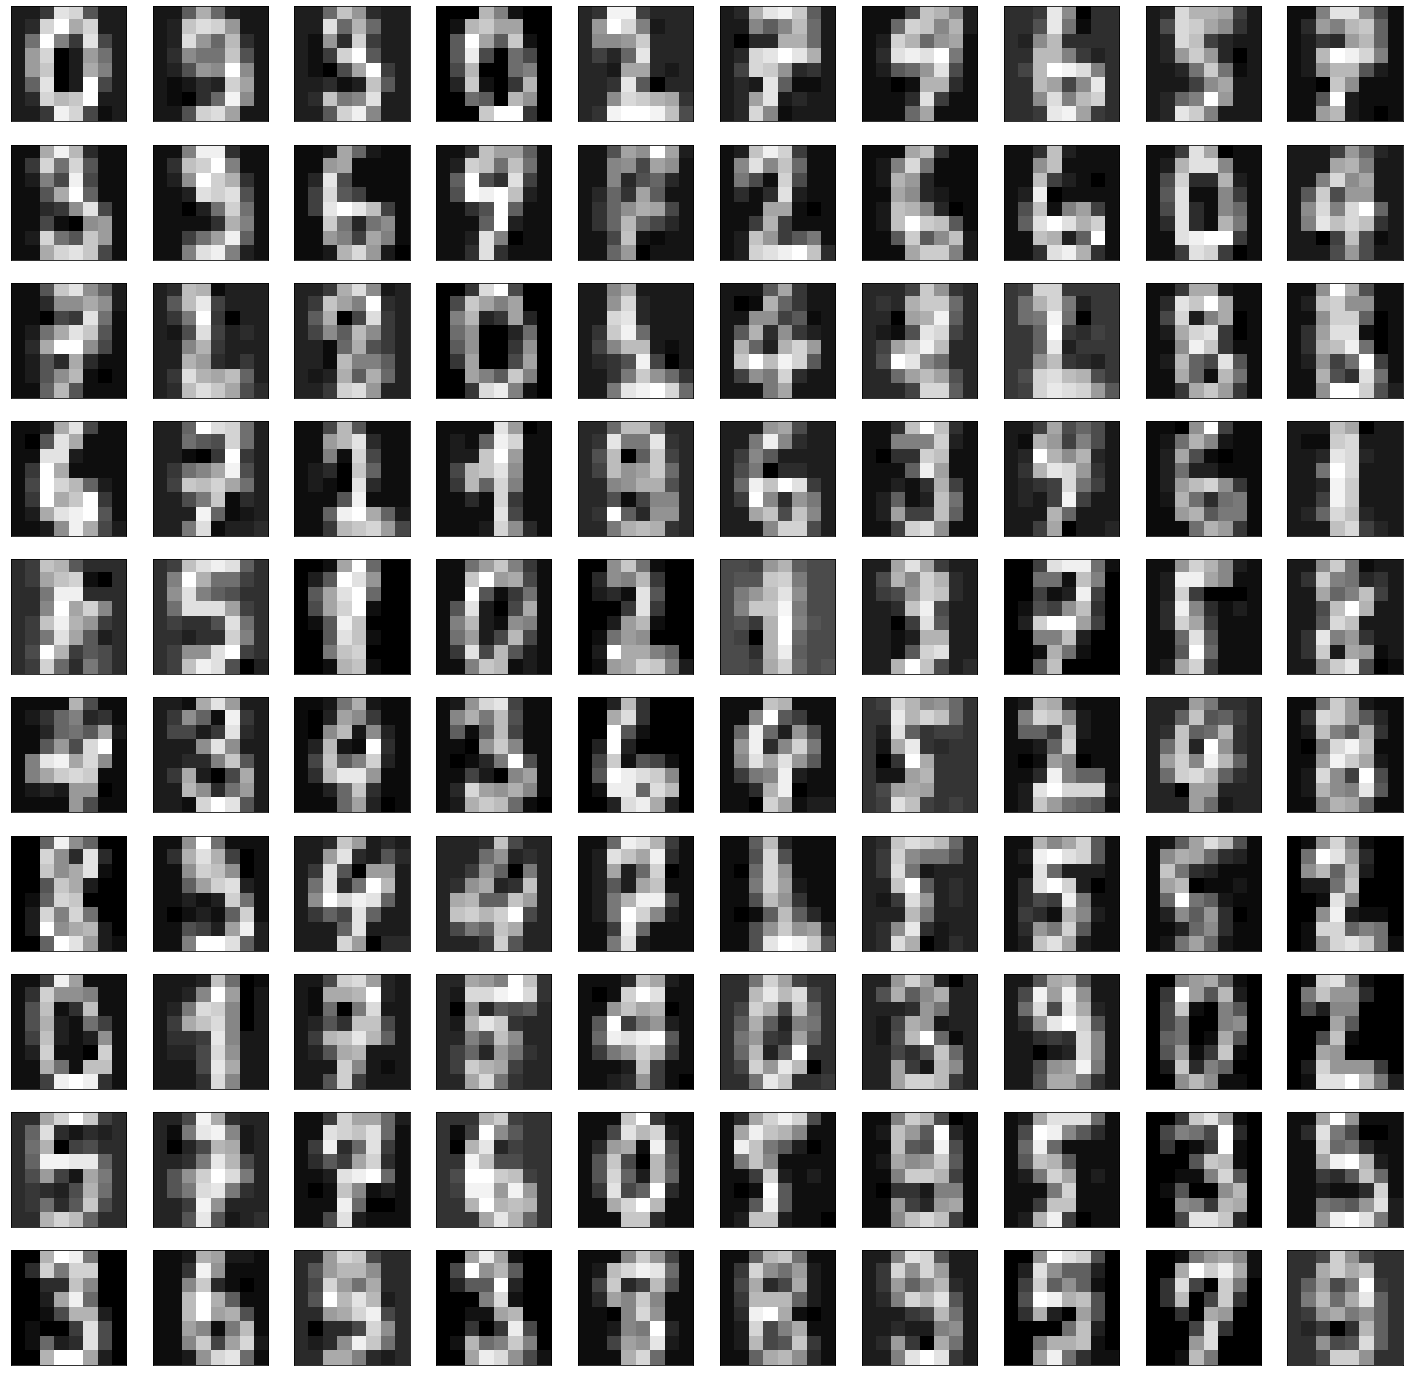

In [145]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

digits = load_digits()

pca = PCA(0.95)

data = pca.fit_transform(digits.data)


np.random.seed(227)

n_classes = 50
cov_type = 'full'
gmm = GaussianMixture(n_components=n_classes, covariance_type=cov_type, random_state=0)
gmm.fit(data)
sample, keys = gmm.sample(n_samples=100)

sample_digits = pca.inverse_transform(sample)

sample_digits =  sample_digits.reshape((len(sample_digits), 8, 8))
pca_images = np.array(sample_digits, dtype='int32')

fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(25, 25))
indeces = np.arange(100)
np.random.shuffle(indeces)
for i in range(100):
    ax[i // 10, i % 10].imshow(pca_images[indeces[i]], cmap='gray')
    ax[i // 10, i % 10].set_xticks(())
    ax[i // 10, i % 10].set_yticks(())

fig.set_figwidth(25)    
fig.set_figheight(25) 
plt.show()